#### Test sentence-transformers with Wikipedia Big Data classification approach 

In [1]:
import wikipedia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

##### Get Wiki Big Data Summary and embed

In [2]:
print(wikipedia.search("big data"))

['Big data', 'Big Data (band)', 'Data', 'Data science', 'Big data ethics', 'List of big data companies', 'Data lake', 'Data analysis', 'Big data maturity model', 'Data mining']


In [3]:
# Note: if the big data wiki summary is updated, method results will change!
# Timestamp for download is listed below - if needed in the future, this version of the summary can be found on
# Big data Wiki under the View History tab.  If we want to pursue this method futher, we should use a package/API 
# that allows the user to request a summary from a particular date/version.

big_data_wiki_text = wikipedia.summary("Big data")  # downloaded on Dec 15, 2022, 3:30pm
# https://en.wikipedia.org/w/index.php?title=Big_data&diff=1123680238&oldid=1120846918

print(big_data_wiki_text)

Though used sometimes loosely partly because of a lack of formal definition, the interpretation that seems to best describe Big data is the one associated with large body of information that we could not comprehend when used only in smaller amounts. In it primary definition though, Big data refers to data sets that are too large or complex to be dealt with by traditional data-processing application software. Data with many fields (rows) offer greater statistical power, while data with higher complexity (more attributes or columns) may lead to a higher false discovery rate. Big data analysis challenges include capturing data, data storage, data analysis, search, sharing, transfer, visualization, querying, updating, information privacy, and data source. Big data was originally associated with three key concepts: volume, variety, and velocity. The analysis of big data presents challenges in sampling, and thus previously allowing for only observations and sampling. Thus a fourth concept, v

In [4]:
# Nov 15 version of Big data Wiki summary:

big_data_wiki_text = big_data_wiki_text[283:]
print(big_data_wiki_text)

Big data refers to data sets that are too large or complex to be dealt with by traditional data-processing application software. Data with many fields (rows) offer greater statistical power, while data with higher complexity (more attributes or columns) may lead to a higher false discovery rate. Big data analysis challenges include capturing data, data storage, data analysis, search, sharing, transfer, visualization, querying, updating, information privacy, and data source. Big data was originally associated with three key concepts: volume, variety, and velocity. The analysis of big data presents challenges in sampling, and thus previously allowing for only observations and sampling. Thus a fourth concept, veracity, refers to the quality or insightfulness of the data. Without sufficient investment in expertise for big data veracity, then the volume and variety of data can produce costs and risks that exceed an organization's capacity to create and capture value from big data.Current us

In [5]:
#model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('all-MiniLM-L6-v2')

In [6]:
wiki_embed = model.encode(big_data_wiki_text)
print(wiki_embed.shape)

(384,)


##### Read in Federal RePORTER abstracts and embed

In [7]:
# pull in data
df = pd.read_pickle("../../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)

print(df.shape)

(1143869, 30)


In [8]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...


In [9]:
#abstract_embeddings = model.encode(df['ABSTRACT'])
#print(abstract_embeddings.shape)

# Kristian saved these

##### Read in computed BERT embeddings

In [9]:
# load BERT embeddings
vector = pd.read_csv('../../../../data/prd/Doc2Vec/bert_final.csv')    

In [10]:
vector.shape

(1143869, 384)

##### Calculate similarity between Big Data Wiki summary and abstracts

In [11]:
scores = cosine_similarity(
    [wiki_embed],
    vector
)
#print(scores)

In [12]:
type(scores)

numpy.ndarray

In [13]:
scores.max()

0.6762190895012082

In [14]:
np.argmax(scores)

540921

In [15]:
df['ABSTRACT'][540921]

"DESCRIPTION (provided by applicant): As technology continues to advance, our ability to collect data on nearly every aspect of our lives has improved exponentially. While amassing large amounts of data has become easier, the question of how that data can be used is still being determined. The hope is that the vast volume of data, often referred to as  big data,  can be analyzed and mined to help solve major problems in healthcare and in business. Yet most of the discussions about big data focus on what it holds for the future, and not about how big data is influencing decision-makers today. With conversations about big data generally addressing its future uses, many fundamental questions are going unanswered. The goal of this year's conference, titled  How are Decision Makers Using Big and Small Data Now? , is to define what big data is and what it means to various stakeholders in healthcare by taking status of how decision-makers are using big data now. Conference attendees will gain

In [16]:
scores.min()

-0.2028002339350856

In [17]:
np.argmin(scores)

708525

In [18]:
df['ABSTRACT'][708525]

'&lt;!-- /* Font Definitions */@font-face{panose-1:0 0 0 0 0 0 0 0 0 0;mso-font-charset:128;mso-generic-mso-font-format:other;mso-font-pitch:fixed;mso-font-signature:1 134676480 16 0 131072 0;}@font-face{panose-1:2 4 5 3 5 4 6 3 2 4;mso-font-charset:0;mso-generic-mso-font-pitch:variable;mso-font-signature:3 0 0 0 1 0;}@font-face{panose-1:2 4 5 3 5 4 6 3 2 4;mso-font-charset:0;mso-generic-mso-font-pitch:variable;mso-font-signature:3 0 0 0 1 0;} /* Style Definitions */p.MsoNormal, li.MsoNormal, div.MsoNormal{mso-style-unhide:no;mso-style-qformat:yes;mso-style-parent:  ;margin:0in;margin-bottom:.0001pt;mso-pagination:widow-orphan;;mso-ascii-mso-ascii-theme-font:minor-latin;mso-fareast-mso-fareast-theme-font:minor-fareast;mso-hansi-mso-hansi-theme-font:minor-latin;mso-bidi-mso-bidi-theme-font:minor-bidi;}.MsoChpDefault{mso-style-type:export-only;mso-default-props:yes;mso-ascii-mso-ascii-theme-font:minor-latin;mso-fareast-mso-fareast-theme-font:minor-fareast;mso-hansi-mso-hansi-theme-font:m

In [19]:
scores.shape

(1, 1143869)

In [20]:
scores[0].shape

(1143869,)

In [21]:
scores[0][0:10]

array([ 0.1158897 ,  0.11239832,  0.07516901,  0.00435888, -0.00693279,
        0.10332922,  0.12685726,  0.08216588,  0.08385753,  0.20399945])

Text(0, 0.5, 'Number of Abstracts')

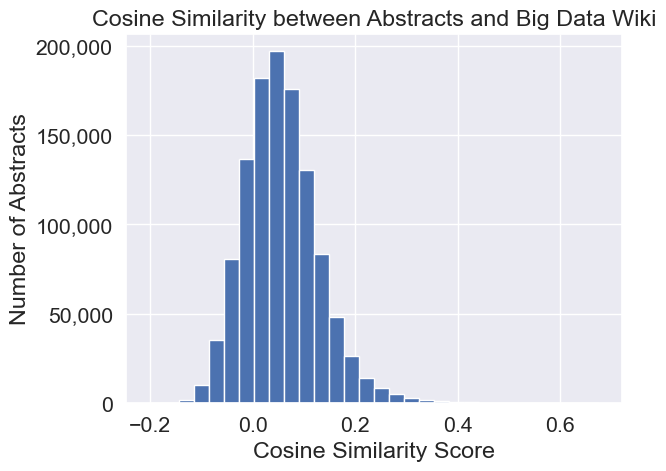

In [22]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots()
plt.hist(scores[0], bins=30)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Cosine Similarity between Abstracts and Big Data Wiki')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of Abstracts')

#plt.savefig('figures/wiki_sim.png', bbox_inches='tight')

In [23]:
scores_df = pd.DataFrame(scores[0])
scores_df.describe()

,0
count,1.143869e+06
mean,5.597372e-02
std,7.344299e-02
min,-2.028002e-01
25%,6.107218e-03
50%,5.014612e-02
75%,9.761767e-02
max,6.762191e-01


In [24]:
np.percentile(scores[0], 99.9)

0.4085942889627746

In [25]:
df['wiki_scores'] = scores[0]

In [26]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0.115890
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,0.112398
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,0.075169
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,0.004359
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,-0.006933


In [27]:
df["big_data_cnt"] = 0

In [28]:
df.shape

(1143869, 32)

In [29]:
for idx, abstract in enumerate(df['ABSTRACT']):
    abstract_lowercase = abstract.lower()
    if "big data" in abstract_lowercase or "big-data" in abstract_lowercase:
        df.iloc[idx, 31] = abstract_lowercase.count("big data") + abstract_lowercase.count("big-data")

In [30]:
sum(df["big_data_cnt"])

8503

In [31]:
sum(df["big_data_cnt"] != 0)

4628

### Investigate score threshold using labelled data

In [32]:
# read in new training dataset - 1600 labeled abstracts
df_lab = pd.read_csv("../../../../data/prd/Digital_abstract_labelled/DEC-2022-labelled_abstracts.csv", dtype=str)
print(df_lab.shape)
df_lab.head()

(1600, 8)


,Unnamed: 0,Duplicates,index,PROJECT_ID,ABSTRACT,Is it related to Big-Data,Expert name,label
0,0,0,979,950056,ï»¿ DESCRIPTION (provided by applicant): Adv...,1,Kristian,Big-data
1,1,0,816,1178172,Project Summary/AbstractThe establishment of t...,1,Kristian,Big-data
2,2,0,1096,163037,DESCRIPTION (provided by applicant): The long-...,0,Kristian,Non Big-data
3,3,0,725,880197,DESCRIPTION (provided by applicant): The most ...,0,Kristian,Non Big-data
4,4,0,92,887331,Transsphenoidal surgery (TSS) is the best trea...,0,Kristian,Non Big-data


In [33]:
df_lab = df_lab[['PROJECT_ID','ABSTRACT','Is it related to Big-Data','label']]
df_lab.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label
0,950056,ï»¿ DESCRIPTION (provided by applicant): Adv...,1,Big-data
1,1178172,Project Summary/AbstractThe establishment of t...,1,Big-data
2,163037,DESCRIPTION (provided by applicant): The long-...,0,Non Big-data
3,880197,DESCRIPTION (provided by applicant): The most ...,0,Non Big-data
4,887331,Transsphenoidal surgery (TSS) is the best trea...,0,Non Big-data


In [34]:
df_merge = df.merge(df_lab[["PROJECT_ID", "label"]], how='left', on='PROJECT_ID')

In [35]:
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,wiki_scores,big_data_cnt,label
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0.115890,0,NaN
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,0.112398,0,NaN
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,0.075169,0,NaN
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,0.004359,0,NaN
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,-0.006933,0,NaN


In [36]:
df_merge['label'].value_counts()

Non Big-data    913
Big-data        687
Name: label, dtype: int64

In [37]:
label_BD_scores = df_merge.loc[df_merge['label'] == 'Big-data', "wiki_scores"]

In [38]:
label_NBD_scores = df_merge.loc[df_merge['label'] == 'Non Big-data', "wiki_scores"]

In [39]:
df_merge.loc[df_merge['label'].isna(), "label"] = "no label"

In [40]:
sum(df_merge['label'].isna())

0

In [41]:
label_NA_scores = df_merge.loc[df_merge['label'] == 'no label', "wiki_scores"]

In [42]:
len(label_NA_scores)   # len(df) - 1600

1142269

Text(1.8, 0.5, 'n = 913')

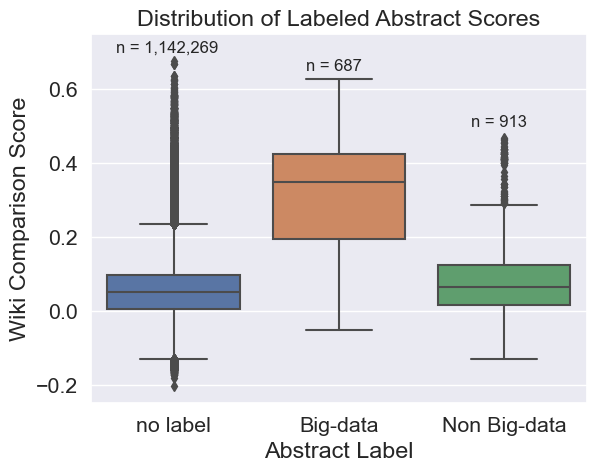

In [43]:
sns.set(font_scale=1.4)
sns.boxplot(data=df_merge, x="label", y="wiki_scores")
plt.ylabel('Wiki Comparison Score')
plt.xlabel('Abstract Label')
plt.title('Distribution of Labeled Abstract Scores')
plt.ylim(-0.25,0.75)

plt.text(-0.35, 0.7, f"n = {len(label_NA_scores):,}", fontsize=12)
plt.text(0.8, 0.65, f"n = {len(label_BD_scores):,}", fontsize=12)
plt.text(1.8, 0.50, f"n = {len(label_NBD_scores):,}", fontsize=12)

#plt.savefig('figures/wiki_scores_by_label_box.png', bbox_inches='tight')

Text(1.8, 0.55, 'n = 913')

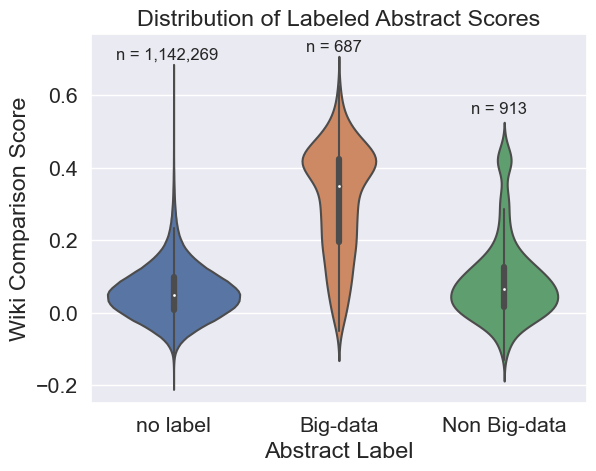

In [44]:
sns.set(font_scale=1.4)
sns.violinplot(data=df_merge, x="label", y="wiki_scores")
plt.ylabel('Wiki Comparison Score')
plt.xlabel('Abstract Label')
plt.title('Distribution of Labeled Abstract Scores')
plt.ylim(-0.25,0.77)

plt.text(-0.35, 0.7, f"n = {len(label_NA_scores):,}", fontsize=12)
plt.text(0.8, 0.72, f"n = {len(label_BD_scores):,}", fontsize=12)
plt.text(1.8, 0.55, f"n = {len(label_NBD_scores):,}", fontsize=12)

#plt.savefig('figures/wiki_scores_by_label.png', bbox_inches='tight')

In [45]:
# look at some examples

pd.DataFrame(label_BD_scores).describe()

,wiki_scores
count,687.000000
mean,0.309659
std,0.150290
min,-0.050797
25%,0.193826
50%,0.348872
75%,0.425420
max,0.625970


In [46]:
pd.DataFrame(label_NBD_scores).describe()

,wiki_scores
count,913.000000
mean,0.088407
std,0.114512
min,-0.130109
25%,0.014572
50%,0.064071
75%,0.124768
max,0.466685


In [47]:
print(min(label_BD_scores))
print(np.argmin(label_BD_scores))

-0.0507972526921192
118


In [48]:
np.argsort(label_BD_scores)[0:10]

373      118
672      196
3557     564
3987     530
6842     518
10200      7
11897    164
13808    529
20201    573
57780     30
Name: wiki_scores, dtype: int64

In [49]:
df_merge[df_merge['label'] == 'Big-data']["ABSTRACT"].iloc[118]

'AbstractThe majority of schizophrenia patients fail to achieve premorbid status and functional outcomes (e.g.employment, interpersonal relationships, independent living) are very poor, despite effective psychosissymptom reduction with antipsychotic medications. Cognitive impairments are broad and persistent andunderlie the functional deficits of the illness. To date, however, there have been no characteristics identified inschizophrenia that provide good predictors for treatment targets of cognitive and functional deficits. Glutamatedysfunction may significantly contribute to the cognitive and functional deficits in schizophrenia. The proposedresearch is centered around the pathophysiological model of N-methyl-D-aspartate receptor (NMDAR)hypofunction of schizophrenia. This dysfunction produces damage to the dendritic portion of neurons, whichleads to chronic cognitive and functional disabilities. Patients who have lower glutamate levels may manifestwith broad cognitive impairment and 

In [50]:
print(max(label_NBD_scores))
print(np.argmax(label_NBD_scores))

0.4666852671496321
489


In [51]:
np.argsort(label_NBD_scores)

1050        87
1387       401
1413       566
1681       597
1990        51
          ... 
1141433    589
1141803    585
1143731    893
1143778    881
1143822    489
Name: wiki_scores, Length: 913, dtype: int64

In [52]:
df_merge[df_merge['label'] == 'Non Big-data']["ABSTRACT"].iloc[489]

'Data intensive research for many scientific disciplines has changed the basic research methods for those disciplines. For example large plant genomic data bases have changed how research is done in plant biology where analyzing the genes in the data base becomes a critical component of plant genetics research. This workshop addresses the emerging discipline of data intensive research in education through case studies of how data intensive research emerged in other disciplines.  The workshop is a two-day workshop that will feature case studies in disciplines such as astronomy, plant genomics, engineering, ocean sciences, and health information technology on the first day. The case studies will be presented by two participants within each domain - the provider of the data intensive research and the user of the research. The second day will be devoted to cross-cutting issues such as data interoperability, privacy, security, open data access, and other policy and data curation issues.'

#### Scratch work

In [92]:
# get old Wiki from Nov 15-17
# 1120846918 revision_id

bd = wikipedia.page("Big data")

In [96]:
bd.revision_id

1126395551

In [24]:
import requests
 
subject = 'Big data'
url = 'https://en.wikipedia.org/w/api.php'
params = {
        'action': 'query',
        'format': 'json',
        'titles': subject,
        'prop': 'extracts|revisions',
        'rvlimit': 1,
        'rvprop': 'content',
        'rvdir': 'newer',
        'rvstart': '2022-11-15T00:00:00Z'
        #'exintro': True,
        #'explaintext': True
    }
 
response = requests.get(url, params=params)
data = response.json()
 
page = next(iter(data['query']['pages'].values()))
#print(page['extract'])